## Import Library, Load Data

In [103]:
# !pip install finance-datareader

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import FinanceDataReader as fdr
import re, unicodedata

from konlpy.tag import Okt
from string import whitespace, punctuation

In [105]:
df= pd.read_csv('C:\\Users\\19lya\\Documents\\Data\\Capstone\\original_삼성전자_02.csv')
df.head()

,Unnamed: 0,company,date,title,content
0,0,삼성전자,2023.02.01,삼성전자 ‘수평 호칭’ 경영·임원진 확대,영문 이니셜·닉네임 등 사용 방침\n기존의 직책·직급 이용 호칭 금지\n\n삼성전자...
1,1,삼성전자,2023.02.01,`이재용 회장님` 대신 `JY`… 수평호칭 뿌리내린 삼성전자,삼성전자가 수평적 조직 문화를 위해 도입했던 '수평 호칭'의 범위를 기존 직원들에서...
2,2,삼성전자,2023.02.01,"삼성전자 ‘반도체 쇼크’… 영업익 97% 감소, 적자 간신히 면해",[반도체 실적 악화]\n1년새 8조8000억→2700억 기록\n삼성전자 직원들이 경...
3,3,삼성전자,2023.02.01,"삼성·LG전자, 맞춤형·UP가전으로 美 시장 공략(종합)","'KBIS 2023' 참가\n삼성전자, 친환경·초연결 강조\nLG전자, UP가전 강..."
4,4,삼성전자,2023.02.01,"""삼성전자 사실상 감산 돌입""…골드만삭스는 되레 목표가 올렸다",■'어닝쇼크' 삼성전자···증권가 전망은\n인위적 감산 없다고는 하지만\n시설 재배...


## EDA

In [106]:
df.shape

(812, 5)

In [107]:
df.columns

Index(['Unnamed: 0', 'company', 'date', 'title', 'content'], dtype='object')

In [108]:
df= df.drop('Unnamed: 0', axis=1)
df= df.drop('company', axis=1)
df.head()

,date,title,content
0,2023.02.01,삼성전자 ‘수평 호칭’ 경영·임원진 확대,영문 이니셜·닉네임 등 사용 방침\n기존의 직책·직급 이용 호칭 금지\n\n삼성전자...
1,2023.02.01,`이재용 회장님` 대신 `JY`… 수평호칭 뿌리내린 삼성전자,삼성전자가 수평적 조직 문화를 위해 도입했던 '수평 호칭'의 범위를 기존 직원들에서...
2,2023.02.01,"삼성전자 ‘반도체 쇼크’… 영업익 97% 감소, 적자 간신히 면해",[반도체 실적 악화]\n1년새 8조8000억→2700억 기록\n삼성전자 직원들이 경...
3,2023.02.01,"삼성·LG전자, 맞춤형·UP가전으로 美 시장 공략(종합)","'KBIS 2023' 참가\n삼성전자, 친환경·초연결 강조\nLG전자, UP가전 강..."
4,2023.02.01,"""삼성전자 사실상 감산 돌입""…골드만삭스는 되레 목표가 올렸다",■'어닝쇼크' 삼성전자···증권가 전망은\n인위적 감산 없다고는 하지만\n시설 재배...


### 일별 뉴스 기사 개수 - 삼성전자, 23년 2월

In [109]:
df_cnt= pd.DataFrame(df['date'].value_counts(sort= False))

df_cnt.reset_index(inplace= True)
df_cnt.columns= ['date', 'cnt']

for i in range(len(df_cnt)):
    df_cnt.iloc[i,0]= int(df_cnt.iloc[i,0][-2:])
    
df_cnt.head()

,date,cnt
0,1,56
1,2,72
2,3,17
3,4,2
4,5,29


In [110]:
price = fdr.DataReader('005930', '2023-02-01', '2023-02-28') #삼성전자 주가

price.reset_index(inplace= True)
price.columns= ['date', 'open', 'high', 'low', 'close', 'volume', 'change']

price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    20 non-null     datetime64[ns]
 1   open    20 non-null     int64         
 2   high    20 non-null     int64         
 3   low     20 non-null     int64         
 4   close   20 non-null     int64         
 5   volume  20 non-null     int64         
 6   change  20 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 1.2 KB


In [111]:
for i in range(len(price)):
    price.iloc[i,0]= int(str(price.iloc[i,0])[-2:])
    
price.tail(30)

,date,open,high,low,close,volume,change
0,0,62600,62700,61000,61800,18570133,0.013115
1,0,63200,63900,62600,63500,23285983,0.027508
2,0,63900,64000,63000,63800,15194598,0.004724
3,0,62800,63000,61600,61600,15529356,-0.034483
4,0,61900,62500,61600,61900,14491039,0.004870
5,0,62800,63300,62400,63100,12243125,0.019386
6,0,63000,63300,62300,63000,12164865,-0.001585
7,0,62600,63000,62400,62800,9382576,-0.003175
8,0,62900,63000,62300,62900,10730362,0.001592
9,0,63600,63900,63200,63200,9126664,0.004769


In [112]:
compare= pd.concat([df_cnt, price], axis= 1)
compare.head()

,date,cnt,date,open,high,low,close,volume,change
0,1,56,0,62600.0,62700.0,61000.0,61800.0,18570133.0,0.013115
1,2,72,0,63200.0,63900.0,62600.0,63500.0,23285983.0,0.027508
2,3,17,0,63900.0,64000.0,63000.0,63800.0,15194598.0,0.004724
3,4,2,0,62800.0,63000.0,61600.0,61600.0,15529356.0,-0.034483
4,5,29,0,61900.0,62500.0,61600.0,61900.0,14491039.0,0.004870


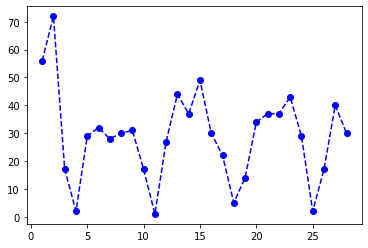

In [113]:
plt.plot(df_cnt['date'], df_cnt['cnt'], marker='o', linestyle='--', color= 'b')
# plt.plot(df_cnt['date'], price['Close'], marker='o', color= 'r')
plt.show()

## Preprocessing

In [114]:
df.head()

,date,title,content
0,2023.02.01,삼성전자 ‘수평 호칭’ 경영·임원진 확대,영문 이니셜·닉네임 등 사용 방침\n기존의 직책·직급 이용 호칭 금지\n\n삼성전자...
1,2023.02.01,`이재용 회장님` 대신 `JY`… 수평호칭 뿌리내린 삼성전자,삼성전자가 수평적 조직 문화를 위해 도입했던 '수평 호칭'의 범위를 기존 직원들에서...
2,2023.02.01,"삼성전자 ‘반도체 쇼크’… 영업익 97% 감소, 적자 간신히 면해",[반도체 실적 악화]\n1년새 8조8000억→2700억 기록\n삼성전자 직원들이 경...
3,2023.02.01,"삼성·LG전자, 맞춤형·UP가전으로 美 시장 공략(종합)","'KBIS 2023' 참가\n삼성전자, 친환경·초연결 강조\nLG전자, UP가전 강..."
4,2023.02.01,"""삼성전자 사실상 감산 돌입""…골드만삭스는 되레 목표가 올렸다",■'어닝쇼크' 삼성전자···증권가 전망은\n인위적 감산 없다고는 하지만\n시설 재배...


In [115]:
pattern_whitespace = re.compile(f'[{whitespace}]+')

# newline -> space
df['content'] = df.content.str.replace(pattern_whitespace, ' ').map(lambda x: unicodedata.normalize('NFC', x)).str.strip()
df['title'] = df.title.fillna('').replace(pattern_whitespace, ' ').map(lambda x: unicodedata.normalize('NFC', x)).str.strip()

In [116]:
def CleanEnd(text):
    email = re.compile(r'[-_0-9a-z]+@[-_0-9a-z]+(?:\.[0-9a-z]+)+', flags=re.IGNORECASE)
    url = re.compile(r'(?:https?:\/\/)?[-_0-9a-z]+(?:\.[-_0-9a-z]+)+', flags=re.IGNORECASE)
    etc = re.compile(r'\.([^\.]*(?:기자|특파원|교수|작가|대표|논설|고문|주필|부문장|팀장|장관|원장|연구원|이사장|위원|실장|차장|부장|에세이|화백|사설|소장|단장|과장|기획자|큐레이터|저작권|평론가|©|©|ⓒ|\@|\/|=|▶|무단|전재|재배포|금지|\[|\]|\(\))[^\.]*)$')
    bracket = re.compile(r'^((?:\[.+\])|(?:【.+】)|(?:<.+>)|(?:◆.+◆)\s)')
    
    result = email.sub('', text)
    result = url.sub('', result)
    result = etc.sub('.', result)
    result = bracket.sub('', result).strip()

    return result

df['title'] = df.title.map(CleanEnd)
df['content'] = df.content.map(CleanEnd)

In [117]:
def TextFilter(text):
    punct = ''.join([chr for chr in punctuation if chr != '%'])
    filtering = re.compile(f'[{whitespace}{punct}]+')
    onlyText = re.compile(r'[^\% 0-9a-zA-Zㄱ-ㅣ가-힣]+')

    result = filtering.sub(' ', text)
    result = onlyText.sub(' ', result).strip()
    result = filtering.sub(' ', result)
    
    return result

df['title'] = df.title.map(TextFilter)
df['content'] = df.content.map(TextFilter)

In [118]:
df.head(20)

,date,title,content
0,2023.02.01,삼성전자 수평 호칭 경영 임원진 확대,영문 이니셜 닉네임 등 사용 방침 기존의 직책 직급 이용 호칭 금지 삼성전자가 수평...
1,2023.02.01,이재용 회장님 대신 JY 수평호칭 뿌리내린 삼성전자,삼성전자가 수평적 조직 문화를 위해 도입했던 수평 호칭 의 범위를 기존 직원들에서 ...
2,2023.02.01,삼성전자 반도체 쇼크 영업익 97% 감소 적자 간신히 면해,1년새 8조8000억 2700억 기록 삼성전자 직원들이 경기 화성시 반도체 공장에서...
3,2023.02.01,삼성 LG전자 맞춤형 UP가전으로 시장 공략 종합,KBIS 2023 참가 삼성전자 친환경 초연결 강조 LG전자 UP가전 강조 삼성전자...
4,2023.02.01,삼성전자 사실상 감산 돌입 골드만삭스는 되레 목표가 올렸다,어닝쇼크 삼성전자 증권가 전망은 인위적 감산 없다고는 하지만 시설 재배치 통해 공급...
5,2023.02.01,악재는 이미 반영 삼성전자 분할매수 기회라는 증권가,사진 뉴스1 인위적 감산은 없다 는 기조가 재확인되자 실망매물이 쏟아졌던 삼성전자에...
6,2023.02.01,삼성전자 투자기업 다 장밋빛 아니다,3년간 코스닥기업 2552억 투자 디엔에프 주가 %나 빠져 레인보우로보틱스 빼고는 ...
7,2023.02.01,삼성전자 전장 오디오 네트워크 사업 선전에 희망,하만 2분기 연속 최대 매출 영업익 북미지역 등 네트워크 매출도 늘어 반도체 한파 ...
8,2023.02.01,SK하이닉스 10년만에 적자전환,4분기 영업손실 1조7012억원 메모리 충격 K 반도체 위기 SK하이닉스가 지난해 ...
9,2023.02.01,삼성 조 SK 조 날아간 반도체 혜택,법인세 최저한세 에 발목잡힌 투자 세액공제 최대 25% 공제율 적용때 실효세율 삼성...


In [119]:
# df.to_csv('###.csv', index= False, encoding= 'utf-8-sig')